In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from interface.GRCWA import GRCWA
from interface.Reticolo import Reticolo
from meent.rcwa import RCWA


    retcouche>retc3 at line 1331 column 37
    retcouche at line 333 column 22
    res1>res1_1D at line 356 column 15
    res1 at line 149 column 25
    run_reticolo at line 31 column 4
    _pyeval at line 57 column 30

    res2 at line 285 column 18
    run_reticolo at line 32 column 5
    _pyeval at line 57 column 30

    res2 at line 285 column 18
    run_reticolo at line 32 column 5
    _pyeval at line 57 column 30

    res2 at line 285 column 18
    run_reticolo at line 32 column 5
    _pyeval at line 57 column 30

    res2 at line 285 column 18
    run_reticolo at line 32 column 5
    _pyeval at line 57 column 30

    res2 at line 285 column 18
    run_reticolo at line 32 column 5
    _pyeval at line 57 column 30

    res2 at line 285 column 18
    run_reticolo at line 32 column 5
    _pyeval at line 57 column 30

    res2 at line 285 column 18
    run_reticolo at line 32 column 5
    _pyeval at line 57 column 30

    res2 at line 285 column 18
    run_reticolo at line 32 column 

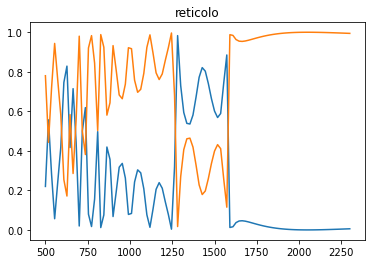

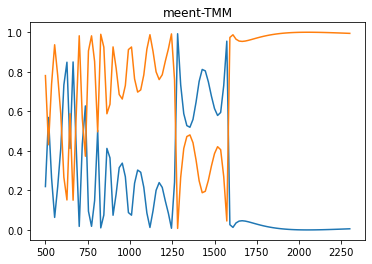

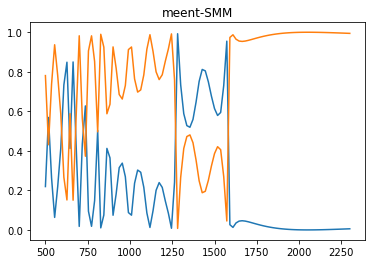

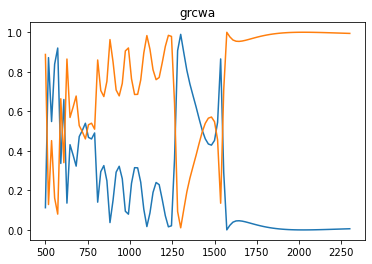

In [2]:
grating_type = 0

n_I = 1
n_II = 1
theta = 45
phi = 0

pol = 1

period = 700

fill_factor = 0.3
thickness = [1120]

n_si = 3.48

# fixed variables
fourier_order = 40

wls = np.linspace(500, 2300, 100)
Nx = 1001
Ny = 1001

pattern = np.ones(Nx, dtype=float)
grid = np.linspace(0, period, 1001)

pattern[:int(Nx * fill_factor)] = n_si
patterns = [[n_si, 1, fill_factor]]  # n_ridge, n_groove, fill_factor

textures = [n_I, [grid, pattern], n_II]

profile = np.array([[0, thickness[0], 0], [1, 2, 3]])

# --- Run ---

# reti
reti = Reticolo(grating_type=0, n_I=n_I, n_II=n_II, theta=theta, phi=phi, fourier_order=fourier_order,
                period=period, wls=wls, pol=pol, textures=textures, profile=profile, engine_type='octave')
try:
    reti.run()
except:
    pass
reti.plot(title='reticolo')

# meent TMM
meent_t = RCWA(grating_type=grating_type, pol=pol, n_I=n_I, n_II=n_II, theta=theta, phi=phi,
               fourier_order=fourier_order, wls=wls, period=[period], patterns=patterns, thickness=thickness)
try:
    meent_t.loop_wavelength()
except:
    pass
meent_t.plot(title='meent-TMM')
# meent SMM
meent_s = RCWA(grating_type=grating_type, pol=pol, n_I=n_I, n_II=n_II, theta=theta, phi=phi,
               fourier_order=fourier_order, wls=wls, period=[period], patterns=patterns, thickness=thickness,
               algo='SMM')
try:
    meent_s.loop_wavelength()
except:
    pass
meent_s.plot(title='meent-SMM')

# grcwa
grcwa = GRCWA(grating_type=grating_type, n_I=n_I, n_II=n_II, theta=theta, phi=phi, psi=0, fourier_order=fourier_order,
              period=period, wls=wls, pol=pol, patterns=pattern ** 2, thickness=thickness)
try:
    grcwa.run()
except:
    pass
grcwa.plot(title='grcwa')